We will learn to use some more features of Python and Jupyter notebooks

In [1]:
import matplotlib.pyplot as plt # For plotting
import matplotlib.gridspec as gridspec # For arranging plots on a grid more comfortably
from ipywidgets import interact, interactive,FloatSlider,IntSlider # For creating interactive plots
from IPython.display import clear_output, display, HTML
%matplotlib inline 
import numpy as np # For management and manipulation of arrays
from sympy import symbols,Eq,solve,lambdify # For symbolic calculations

Let's say we would like to have some symbolic calculations and then to plot the solution of our equation, and play with some parameters to see how changing them changes the solution

In [2]:
def calc_y(x,a,b,c,d):
    return a*x**3 + b*x**2 + c*x + d

In [3]:
# print calc_y(x,a,b,c,d)

In [15]:
aa = 1.
bb = -100.
cc = -500000.
dd = 10.
x = np.linspace(-1000,1000,10000)
print x.shape
print x[0],x[-1]

(10000,)
-1000.0 1000.0


In [5]:
# print calc_y(x,aa,bb,cc,dd)

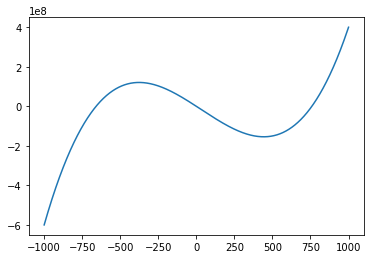

In [16]:
plt.plot(x,calc_y(x,aa,bb,cc,dd))

In [9]:
def z(x,y,a,b,c,d):
    return calc_y(x,a,b,c,d)-y

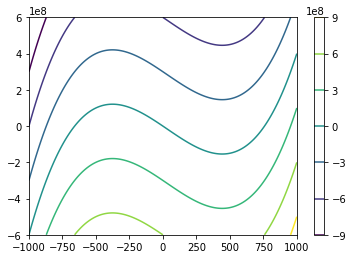

In [10]:
x,y = np.meshgrid(np.linspace(-1000,1000,1000),np.linspace(-6e8,6e8,1000))
plt.contour(x,y,z(x,y,aa,bb,cc,dd))
plt.colorbar()

In [18]:
def plotDependence(a,b,c,d):
    x = np.linspace(-100,100,100)
    plt.plot(x,calc_y(x,a,b,c,d))

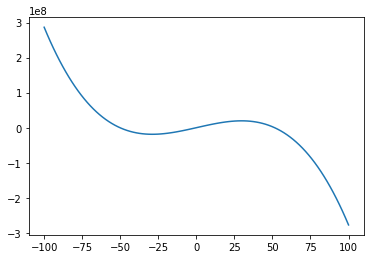

In [21]:
a_widget  = FloatSlider(min=-1000.0, max=1000.0, step=10.0, value=aa)
b_widget  = FloatSlider(min=-1000.0, max=1000.0, step=10.0, value=bb)
c_widget = FloatSlider(min=-1000000.0, max=1000000.0, step=1000.0, value=cc)
d_widget  = FloatSlider(min=-10000.0, max=10000.0, step=10.0, value=dd)
interact(plotDependence,a=a_widget ,b=b_widget,c=c_widget,d=d_widget)

-(c + sqrt(-4*b*d + 4*b*z + c**2))/(2*b)


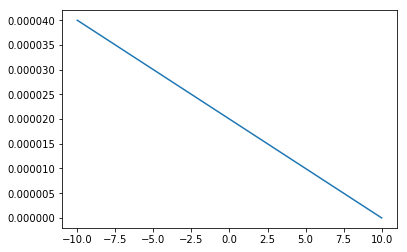

In [11]:
x,z,a,b,c,d = symbols('x z a b c d')
y = b*x**2 + c*x + d - z
sol = solve(Eq(y),x)
print sol[1]
sol1 = lambdify((z,b,c,d),sol[1],"numpy",dummify=False)
zz=np.linspace(-10,10,1000)
plt.plot(zz,sol1(zz,bb,cc,dd))